### Robot Learning

### Assignment 1

Solutions are due on 19.04.2022 before the lecture.

## Task 1.1)

In the game of Tic-Tac-Toe, two players alternate placing crosses and circles on a $3 \times 3$ grid, until one player has a row, column, or diagonal of three own pieces, which is a win.

<center><img src="helpers/tictactoe.png" width="240" height="240"/></center>

In the following tasks, the game state will be encoded by denoting the symbol $X$ by the digit $2$, the symbol $O$ by the digit $0$ and the blank field by the digit $1$. The board is then viewed as a $3 \times 3$ matrix and flattened to a vector with $9$ entries. The entries of this vector are regarded as the digits of base 3 number and finally converted to base 10. Using this number, a table of state values V(s) can be maintained. For example:

$s_{3 \times 3} = \begin{vmatrix}
O &  & O \\
O & X &  \\
X & X & X\\
\end{vmatrix} \leftrightarrow \begin{bmatrix}
0 & 1 & 0 \\
0 & 2 & 1\\
2 & 2 & 2\\
\end{bmatrix} \leftrightarrow 010021222_3 \leftrightarrow 2402_{10} =: E(s_{3 \times 3}) =: s$

Describe an inverse of this map and illustrate the individual steps in a different example leading to a legal board state!

<div style="text-align: right; font-weight:bold"> 4 Points </div>

Please answer in this text cell.

## Task 1.2)

Closely examine the script below, in which two random agents face off in a game of Tic-Tac-Toe. 

Create a suitable structure for state values from the perspective of an agent playing crosses and initialize it for all states with $V(s)=0.1$. Extend the script below to play $num\_episodes=10000$ matches and set $V(s)=1$ when there is a win or $V(s)=0$ when there is a loss or the game ends in a draw, i.e. no further pieces can be placed.

At the end of each game, go through all states that your agent visited in reverse order and set

$V(s) \leftarrow V(s) + 0.2 [ V(s’) - V(s) ]$, where $s’$ is the successor state.

Document $V(s)$ for all nine states where the agent playing crosses can place their first piece!

<div style="text-align: right; font-weight:bold"> 6 Points </div>

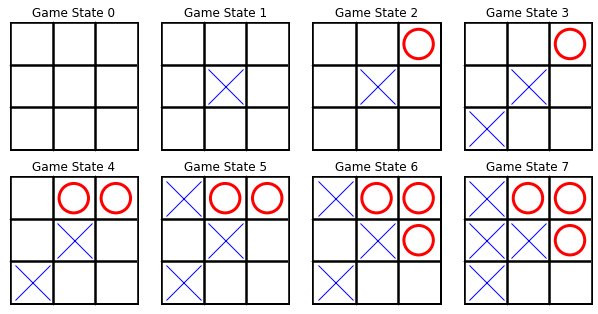

In [1]:
# get the required helper class and visualization function
import numpy as np
from helpers.utils import env, draw_trajectory

# this makes sure that all experiments can be reproduced
np.random.seed(321)

# create a game environment
tictactoe = env()
# reset the game to the empty board - do this before each new episode
tictactoe.reset()

# create a flag which tracks whether the game is over
done = False

# create list to save the trajectory of the agent, start with empty board
states = [np.ones((1,3,3),dtype = int)]

# simulate until the episode is over
while not done:
    # which actions are possible for 'X' at the current state?
    # what are the indices of the states arising from these actions?
    next_state_indices, possible_actions = tictactoe.get_available_actions()
    # select one of the actions randomly
    a_x = tuple(possible_actions[np.random.choice(possible_actions.shape[0])])
    # execute the action using the step function, observe next state and reward
    # the reward r is 1 when 'X' wins and 0 otherwise
    s_matrix, r, done = tictactoe.step(a=a_x)
    # save the state in 3x3 matrix form
    states.append(s_matrix)
    # HINT: call tictactoe.state_to_ind(s_matrix) to encode the state
    # we don't need to simulate for 'O' if the game is already over
    if done:
        break
    # simulate the random action of the 'O' player in the same manner
    _, possible_actions = tictactoe.get_available_actions(p=0)
    a_o = tuple(possible_actions[np.random.choice(possible_actions.shape[0])])
    s_matrix, r, done = tictactoe.step(a=a_o, player=0)
    states.append(s_matrix)

# use the helper function to display how the episode went
draw_trajectory(np.concatenate(states))

## Task 1.3)

Replace your agent's arbitrary action selection by an epsilon-greedy strategy that with probability $0.9$ places your piece such that $V(s)$ is maximized (break ties randomly) and with probability $0.1$ places your piece uniformly among the empty fields.

Play $10000$ automated games. For every $100$ games compute how often your player won and document this learning curve!

Again document $V(s)$ for all nine states where you can place your first piece!

<div style="text-align: right; font-weight:bold"> 6 Points </div>

In [2]:
# Your code goes here

## Task 1.4)

Your trained agent from the previous task should beat the random opponent in most, but not all games. Give two reasons why this is the case. Explain whether your trained agent could plausibly consistently beat a human expert.

<div style="text-align: right; font-weight:bold"> 4 Points </div>

Please answer in this text cell.